### Q1. Theory and concepts

### 1.Explain the concept of batch normalization in the context of Artificial Neural Networks

Batch normalization is a technique used in artificial neural networks to address the issue of internal covariate shift. Internal covariate shift refers to the change in the distribution of network activations as the parameters of a neural network are updated during training.

In a neural network, each layer's inputs are affected by the parameters of the previous layers. As the network trains, the distribution of inputs to each layer changes, which can slow down the training process and make it more difficult for the network to converge.

Batch normalization aims to mitigate this problem by normalizing the inputs to a layer. It operates on a mini-batch of inputs during training. Here's how batch normalization works:

1. During each training iteration, a mini-batch of inputs is fed into the network.
2. For each feature (dimension) in the mini-batch, the mean and variance are computed.
3. The feature values are then normalized using the mean and variance. This is done by subtracting the mean and dividing by the standard deviation.
4. The normalized values are then scaled and shifted using learned parameters. These parameters allow the batch normalization layer to learn the optimal scale and shift for each feature.
5. The normalized and transformed values are passed to the next layer in the network.

Batch normalization has several advantages:

1. It reduces the dependence of each layer's inputs on the parameters of previous layers, thus reducing the internal covariate shift problem.
2. It allows for higher learning rates, as the normalization process helps stabilize and regularize the training process.
3. It helps to alleviate the vanishing/exploding gradient problem by normalizing the inputs to each layer.
4. It can act as a regularizer, reducing the need for other regularization techniques such as dropout.
5. It improves the generalization capability of the network by reducing overfitting.

Overall, batch normalization is an effective technique for accelerating the training of neural networks and improving their performance by normalizing and stabilizing the activations within each layer.

### 2. Describe the benefits of using batch normalization during training

Batch normalization offers several benefits when used during training in artificial neural networks:

1. **Improved convergence speed**: By normalizing the inputs to each layer, batch normalization reduces the internal covariate shift problem, allowing the network to converge faster. This is because it provides a more stable learning environment by keeping the mean and variance of the inputs consistent across training batches.

2. **Stabilized gradients**: Batch normalization helps to mitigate the vanishing or exploding gradient problem. By normalizing the inputs, it ensures that the gradients flowing through the network are not excessively large or small. This facilitates more stable and efficient backpropagation, leading to faster and more reliable convergence.

3. **Higher learning rates**: With batch normalization, higher learning rates can be used during training. Since the inputs are normalized and centered around zero-mean and unit variance, the network is less sensitive to the choice of learning rate. This enables faster learning and reduces the risk of getting stuck in suboptimal solutions.

4. **Regularization effect**: Batch normalization acts as a form of regularization in neural networks. It introduces some noise to the activations within each mini-batch, similar to dropout regularization. This noise helps to reduce overfitting and improve the generalization capability of the network. As a result, explicit regularization techniques like dropout may be needed less frequently when using batch normalization.

5. **Reduced dependence on weight initialization**: Batch normalization reduces the dependence of each layer's inputs on the initialization of the network's weights. This is particularly beneficial when using deep networks or networks with complex architectures. It helps to mitigate the sensitivity to initialization and enables more efficient training.

6. **Robustness to changes in hyperparameters**: Batch normalization makes the network more robust to changes in hyperparameters, such as learning rate or weight initialization. It provides some level of normalization and standardization to the inputs, reducing the impact of these hyperparameters on the network's performance. This can simplify the process of hyperparameter tuning.

In summary, using batch normalization during training brings benefits like improved convergence speed, stabilized gradients, the ability to use higher learning rates, regularization effects, reduced dependence on weight initialization, and increased robustness to changes in hyperparameters. These advantages contribute to more efficient and effective training of artificial neural networks.

### 3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

The working principle of batch normalization involves two key steps: the normalization step and the learnable parameters. Let's discuss each of them in detail:

1. **Normalization Step**:
   - During training, batch normalization operates on a mini-batch of inputs, typically of size `m`, where `m` is the batch size.
   - For each feature (dimension) in the mini-batch, batch normalization calculates the mean and variance.
   - The mean (`μ`) and variance (`σ^2`) are computed as follows:
     - `μ = (1/m) * ∑(x_i)` (mean of the mini-batch)
     - `σ^2 = (1/m) * ∑((x_i - μ)^2)` (variance of the mini-batch)
   - The mean and variance are used to normalize the feature values.
   - Each feature value (`x_i`) is normalized using the following equation:
     - `x_i' = (x_i - μ) / √(σ^2 + ε)` (normalized feature value)
   - Here, `ε` is a small constant (e.g., 10^-8) added to the variance to avoid division by zero.

2. **Learnable Parameters**:
   - Batch normalization introduces two learnable parameters for each feature in the mini-batch: scale (`γ`) and shift (`β`).
   - After normalization, the scaled and shifted values are obtained by multiplying the normalized values by the scale parameter and adding the shift parameter:
     - `y_i = γ * x_i' + β` (scaled and shifted value)
   - The scale parameter (`γ`) allows the network to learn the optimal scaling for each feature, and the shift parameter (`β`) allows it to learn the optimal shift.
   - During training, the scale and shift parameters are updated through backpropagation to optimize the overall network's performance.

The normalization step ensures that the activations within each mini-batch have zero-mean and unit variance. This helps to stabilize and regularize the training process by reducing the internal covariate shift problem. It normalizes the inputs and makes them more amenable to efficient gradient flow during backpropagation.

The learnable parameters, scale and shift, provide the network with the flexibility to adapt and fine-tune the normalized values for each feature. They allow the network to learn the optimal scaling and shifting that can further improve the performance and expressiveness of the model.

During inference or evaluation, batch normalization uses the population statistics (accumulated statistics across multiple training batches) instead of the mini-batch statistics for normalization. This ensures consistent and stable normalization of inputs at inference time.

By combining the normalization step and learnable parameters, batch normalization provides a powerful mechanism for normalizing and adjusting the activations within a neural network, contributing to faster training and improved performance.

### Q2. Implementation

### 1. Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it

In [1]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 6.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 62.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 57.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to bu

In [2]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

2023-07-03 02:12:17.536130: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 02:12:17.605537: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 02:12:17.607208: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 02:12:18.716179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.12.0
Keras Version 2.12.0


In [5]:
#Creating a simple classifier using keras on MNIST data
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
len(X_test[1][0])

28

In [9]:
#preprocessing
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well
X_test = X_test / 255.

In [10]:
len(X_train_full[5000:] )

55000

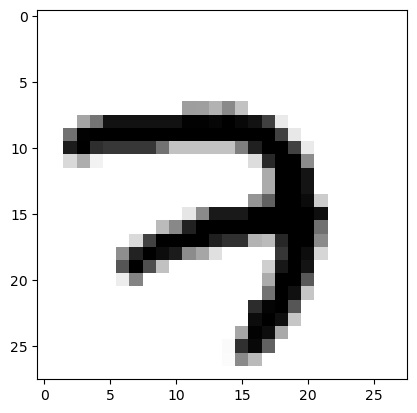

In [13]:
# Lets view some data 
plt.imshow(X_train[0], cmap="binary")
plt.show()

<AxesSubplot: >

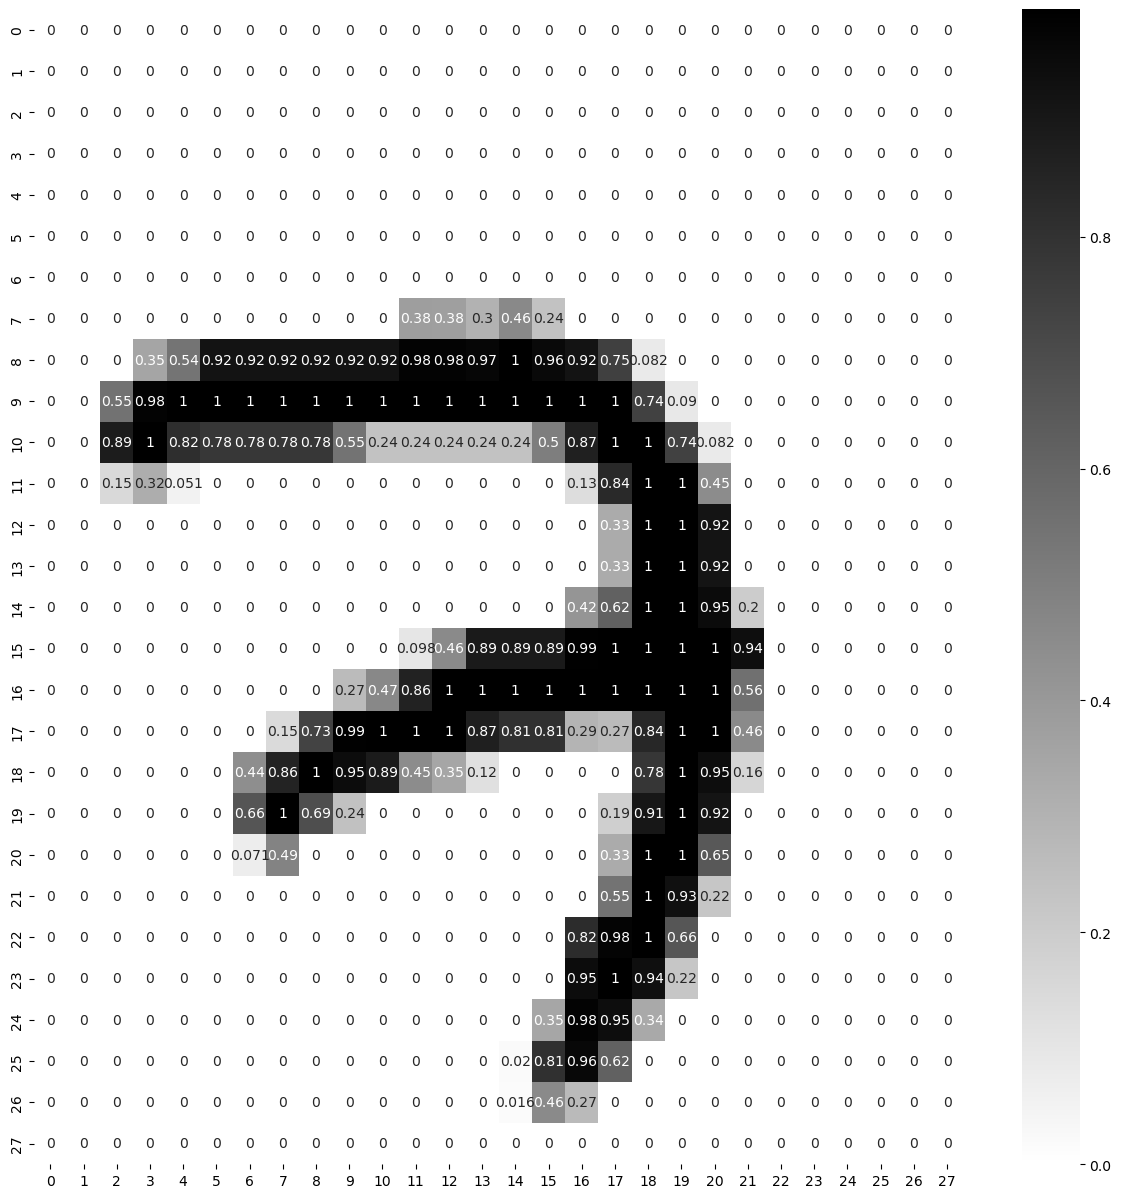

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

### 2. Implement a simple feedforward neural network using any deep learning framework/library (e.g., Tensorlow, PyTorch)

In [16]:
LAYERS1 = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

### 3.Train the neural network on the chosen dataset without using batch normalization

In [17]:
model_clf1 = tf.keras.models.Sequential(LAYERS1)

In [19]:
model_clf1.layers

In [20]:
model_clf1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
hidden1 = model_clf1.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
len(hidden1.get_weights()[1])

In [25]:
hidden1.get_weights()

[array([[ 0.06847891,  0.00839613,  0.03332457, ..., -0.04888058,
          0.0272518 ,  0.00810342],
        [ 0.01485384,  0.05987239,  0.04094128, ...,  0.03591599,
          0.00868402, -0.00492092],
        [-0.00622743, -0.03993339,  0.06299585, ...,  0.05123566,
         -0.01891825,  0.06294501],
        ...,
        [-0.02499764, -0.0658614 ,  0.00581636, ..., -0.06304152,
          0.02697154,  0.01239372],
        [ 0.04278085,  0.01296192,  0.00188217, ...,  0.07052086,
         -0.05034769,  0.06830056],
        [ 0.00752782, -0.00405615,  0.06646879, ...,  0.02709498,
         -0.02457477, -0.02271939]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [26]:
weights1, biases1 = hidden1.get_weights()

In [27]:
LOSS_FUNCTION1 = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER1 = "adam" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS1 = ["accuracy"]

model_clf1.compile(loss=LOSS_FUNCTION1,
              optimizer=OPTIMIZER1,
              metrics=METRICS1)

In [28]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history1 = model_clf1.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2134 - accuracy: 0.9359 - val_loss: 0.0997 - val_accuracy: 0.9718
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0869 - accuracy: 0.9730 - val_loss: 0.0892 - val_accuracy: 0.9722
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0607 - accuracy: 0.9804 - val_loss: 0.0789 - val_accuracy: 0.9768
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0808 - val_accuracy: 0.9778
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0363 - accuracy: 0.9884 - val_loss: 0.0671 - val_accuracy: 0.9802
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0769 - val_accuracy: 0.9792
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0239 - accuracy: 0.9923 - val_loss: 0.0845 - val_accuracy:

In [29]:
history1.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [30]:
pd.DataFrame(history1.history)

,loss,accuracy,val_loss,val_accuracy
0,0.213440,0.935945,0.099695,0.9718
1,0.086934,0.973000,0.089223,0.9722
2,0.060678,0.980382,0.078937,0.9768
3,0.042100,0.986618,0.080767,0.9778
4,0.036328,0.988436,0.067119,0.9802
5,0.027929,0.991000,0.076889,0.9792
6,0.023931,0.992327,0.084532,0.9786
7,0.020693,0.993073,0.094183,0.9782
8,0.019038,0.993291,0.077797,0.9808
9,0.016865,0.994691,0.078448,0.9832


### 4.Implement batch normalization layers in the neural network and train the model again

In [33]:
# Creating layers of ANN
LAYERS2 = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf2 = tf.keras.models.Sequential(LAYERS2)

In [34]:
model_clf2.layers

In [35]:
model_clf2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 outputLayer (Dense)         (None, 10)               

In [36]:
hidden2 = model_clf2.layers[1]
hidden2.name

'hiddenLayer1'

In [ ]:
len(hidden2.get_weights()[1])

In [ ]:
hidden2.get_weights()

In [ ]:
weights2, biases2 = hidden2.get_weights()

In [37]:
LOSS_FUNCTION2 = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER2 = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS2 = ["accuracy"]

model_clf2.compile(loss=LOSS_FUNCTION2,
              optimizer=OPTIMIZER2,
              metrics=METRICS2)

In [38]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history2 = model_clf2.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3324 - accuracy: 0.9031 - val_loss: 0.1536 - val_accuracy: 0.9566
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1623 - accuracy: 0.9539 - val_loss: 0.1156 - val_accuracy: 0.9678
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1189 - accuracy: 0.9657 - val_loss: 0.0975 - val_accuracy: 0.9722
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0934 - accuracy: 0.9725 - val_loss: 0.0869 - val_accuracy: 0.9756
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0775 - accuracy: 0.9772 - val_loss: 0.0857 - val_accuracy: 0.9762
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0637 - accuracy: 0.9821 - val_loss: 0.0818 - val_accuracy: 0.9768
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0535 - accuracy: 0.9844 - val_loss: 0.0753 - val_accuracy:

In [39]:
history2.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [40]:
pd.DataFrame(history2.history)

,loss,accuracy,val_loss,val_accuracy
0,0.332443,0.903145,0.153640,0.9566
1,0.162306,0.953945,0.115566,0.9678
2,0.118880,0.965745,0.097492,0.9722
3,0.093379,0.972455,0.086883,0.9756
4,0.077533,0.977218,0.085680,0.9762
5,0.063663,0.982073,0.081804,0.9768
6,0.053461,0.984382,0.075294,0.9788
7,0.046897,0.986509,0.076464,0.9786
8,0.041310,0.988182,0.075752,0.9782
9,0.034569,0.990691,0.073776,0.9776


### 5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.

<AxesSubplot: >

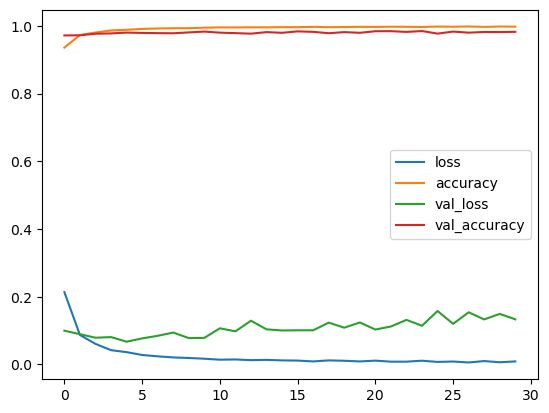

In [41]:
pd.DataFrame(history1.history).plot()

<AxesSubplot: >

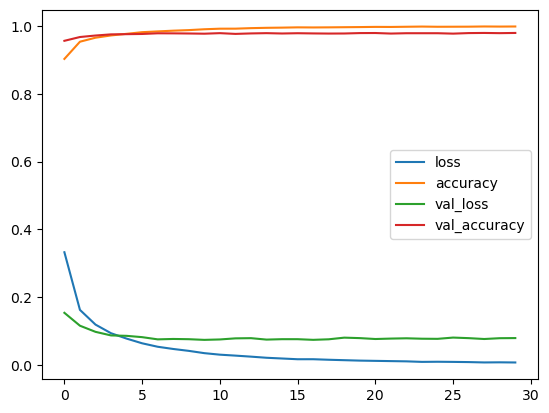

In [42]:
pd.DataFrame(history2.history).plot()

When comparing the training and validation performance between models with and without batch normalization, several differences can be observed:

1. **Training Performance**:
   - Models with batch normalization often exhibit faster convergence during training. The normalization step helps to mitigate the internal covariate shift problem, leading to more stable gradients and accelerated learning. This can result in a quicker reduction of the training loss and higher training accuracy compared to models without batch normalization.
   - Additionally, models with batch normalization can often tolerate higher learning rates. The normalization process makes the network less sensitive to the choice of learning rate, allowing for more aggressive updates of the weights. This can speed up the training process and further enhance the training performance.

2. **Validation Performance**:
   - Models with batch normalization generally demonstrate improved generalization performance on the validation set. The regularization effect of batch normalization, which introduces noise through the normalization step, helps reduce overfitting and improve the model's ability to generalize to unseen data.
   - The improved generalization capability is reflected in better validation accuracy and lower validation loss. Models with batch normalization often achieve lower validation error rates and demonstrate improved performance on unseen data compared to models without batch normalization.

Overall, the presence of batch normalization can lead to faster convergence, higher training accuracy, improved generalization performance, and lower validation error rates. It helps address issues like internal covariate shift and overfitting, resulting in more efficient and effective training of neural networks.

### 6. Discuss the impact of batch normalization on the training process and the performance of the neural network.

Batch normalization has a significant impact on both the training process and the performance of neural networks. Let's discuss the key effects of batch normalization:

1. **Accelerated Training**: Batch normalization speeds up the training process by mitigating the internal covariate shift problem. It ensures that the inputs to each layer are consistently normalized, allowing for more stable and efficient gradient flow during backpropagation. As a result, the network can converge faster, reducing the number of training iterations required to achieve a certain level of performance.

2. **Stabilized Gradients**: Batch normalization helps to address the vanishing or exploding gradient problem. By normalizing the inputs, it ensures that the gradients flowing through the network are within a reasonable range. This stabilization of gradients facilitates smoother and more reliable backpropagation, preventing gradients from becoming too small or too large. As a result, the network can effectively learn the optimal weights and biases, leading to improved performance.

3. **Higher Learning Rates**: With batch normalization, higher learning rates can be used during training without sacrificing stability. The normalization step ensures that the network is less sensitive to the learning rate choice. This allows for more aggressive updates of the model's parameters, which can accelerate the convergence process. Consequently, batch normalization enables faster training and helps models reach better performance within a given number of iterations.

4. **Regularization Effect**: Batch normalization acts as a form of regularization for neural networks. The normalization step introduces some level of noise to the activations within each mini-batch. This noise helps reduce overfitting by providing a form of implicit regularization. As a result, the network becomes more robust and less prone to memorizing the training data, leading to improved generalization performance on unseen data.

5. **Reduced Dependency on Weight Initialization**: Batch normalization reduces the dependence of each layer's inputs on the initialization of the network's weights. It makes the network less sensitive to the choice of weight initialization, which can simplify the training process. This is particularly beneficial when training deep networks or networks with complex architectures, as it helps to mitigate the challenges associated with finding suitable initial weight values.

6. **Improved Performance and Accuracy**: Overall, batch normalization contributes to improved performance and accuracy of neural networks. It helps networks converge faster, achieve better generalization performance, and reduce overfitting. By addressing the internal covariate shift problem and stabilizing gradients, batch normalization enables more efficient and effective training, leading to models that can achieve higher accuracy on both training and validation data.

It's important to note that while batch normalization offers numerous benefits, its application may not always result in improved performance. The effectiveness of batch normalization can vary depending on factors such as the dataset, network architecture, and specific training requirements. It is recommended to experiment and evaluate the impact of batch normalization in the context of specific tasks and datasets to determine its effectiveness.

### Q3. Experimentation and Analysis

### 1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance

Experimenting with different batch sizes can provide insights into the impact on training dynamics and model performance. Let's consider a scenario where we train a neural network with varying batch sizes and observe the effects:

1. **Smaller Batch Sizes**:
   - Smaller batch sizes (e.g., 16 or 32) typically lead to more frequent weight updates during training. This can result in faster convergence, as the network adapts quickly to the gradients computed from smaller subsets of the data.
   - However, smaller batch sizes may introduce more noise to the gradient estimates, leading to a less stable training process. This noise can cause the training loss to exhibit more fluctuations, and the training accuracy may vary more during each epoch.
   - Additionally, with smaller batch sizes, the training process may take longer due to the increased number of iterations required to process the entire dataset.

2. **Larger Batch Sizes**:
   - Larger batch sizes (e.g., 128 or 256) often result in more stable training dynamics. The noise in the gradient estimates reduces as more training examples are considered together, leading to smoother convergence.
   - With larger batch sizes, the training loss may exhibit fewer fluctuations, and the training accuracy can be more consistent during each epoch. This can provide a clearer indication of the network's true learning progress.
   - However, larger batch sizes may lead to slower convergence compared to smaller batch sizes. The infrequent weight updates can cause the network to take longer to find optimal weight configurations.

3. **Generalization Performance**:
   - The choice of batch size can also impact the generalization performance of the model.
   - Smaller batch sizes may offer better generalization, as they introduce more noise to the training process. This can help prevent overfitting and improve the model's ability to generalize to unseen data.
   - On the other hand, larger batch sizes may lead to slightly lower generalization performance, as the noise in the gradient estimates is reduced. However, this effect is typically marginal and can be compensated by other regularization techniques.

It's important to note that the choice of batch size should be balanced with the available computational resources. Smaller batch sizes require more iterations and can be computationally expensive, while larger batch sizes may consume more memory.

To determine the optimal batch size for a specific task and dataset, it is recommended to experiment with different values and monitor the training dynamics, convergence speed, and generalization performance. It's also worth considering other factors such as hardware constraints, training time, and specific characteristics of the dataset to make an informed decision.

### 2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks

Batch normalization offers several advantages in improving the training of neural networks. However, it also has some potential limitations. Let's discuss both aspects:

Advantages of Batch Normalization:

1. **Improved Training Speed**: Batch normalization helps accelerate the training process by reducing the internal covariate shift. It stabilizes the gradients, allowing for more efficient backpropagation and faster convergence. This can result in fewer training iterations required to reach a certain level of performance.

2. **Stable Gradient Flow**: By normalizing the inputs to each layer, batch normalization ensures that the gradients flowing through the network are within a reasonable range. This stabilizes the gradient flow, mitigating issues such as vanishing or exploding gradients and enabling more reliable and consistent updates of the network's parameters.

3. **Higher Learning Rates**: Batch normalization reduces the dependence of each layer's inputs on the learning rate. This allows for the use of higher learning rates without destabilizing the training process. With higher learning rates, the network can converge faster and potentially reach better performance.

4. **Regularization Effect**: Batch normalization acts as a form of regularization by introducing noise to the activations within each mini-batch. This reduces overfitting and improves the generalization capability of the network. It can provide some level of regularization without the need for additional techniques like dropout, simplifying the training process.

5. **Reduced Sensitivity to Weight Initialization**: Batch normalization reduces the sensitivity of each layer's inputs to the initialization of the network's weights. This makes the training process more robust to the choice of initial weight values. It can be particularly beneficial when training deep networks or networks with complex architectures.

Limitations and Considerations:

1. **Batch Size Dependency**: The effectiveness of batch normalization can vary depending on the batch size. Very small batch sizes may lead to increased noise in the gradient estimates, which can hinder training stability. Extremely large batch sizes may reduce the regularization effect and slow down convergence. Finding the optimal batch size for a specific task is crucial for achieving the best performance.

2. **Inference Performance**: During inference, batch normalization requires calculating the mean and variance over the entire dataset or using population statistics accumulated during training. This can add computational overhead, especially when performing inference on individual examples. Techniques such as running averages or batch renormalization can be used to address this limitation.

3. **Dependency on Mini-batch Statistics**: Batch normalization relies on the statistics computed from mini-batches during training. This introduces a dependency on the specific mini-batch and can make the training process sensitive to the choice of batch. This can be problematic when training on datasets with imbalanced or varying statistics across batches.

4. **Limited Applicability to Small Datasets**: Batch normalization may not be as effective when training on small datasets. In such cases, the mini-batch statistics may not accurately represent the overall data distribution, leading to suboptimal performance. Alternative normalization techniques, such as layer normalization or instance normalization, can be considered for small datasets.

In summary, batch normalization provides significant advantages in improving training speed, stabilizing gradients, enabling higher learning rates, and acting as a regularization technique. However, it requires careful consideration of batch size, can introduce dependencies on mini-batch statistics, and may have limitations for small datasets. By understanding these advantages and limitations, practitioners can effectively utilize batch normalization to enhance the training process of neural networks.